# DATA ANALYSIS ON MENTAL HEALTH ISSUES AMONG STUDENTS

In [1]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('Student Mental health.csv') 

In [3]:
# Display first 5 rows
df.head()

,Timestamp,Gender,Age,course,year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,seek help
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   course          101 non-null    object 
 4   year of Study   101 non-null    object 
 5   CGPA            101 non-null    object 
 6   Marital status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic attack    101 non-null    object 
 10  seek help       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [5]:
df.shape

(101, 11)

In [6]:
df.dtypes

Timestamp          object
Gender             object
Age               float64
course             object
year of Study      object
CGPA               object
Marital status     object
Depression         object
Anxiety            object
Panic attack       object
seek help          object
dtype: object

In [7]:
# Check for missing/null values
df.isnull().sum()

Timestamp         0
Gender            0
Age               1
course            0
year of Study     0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic attack      0
seek help         0
dtype: int64

In [8]:
df.nunique()

Timestamp         92
Gender             2
Age                7
course            49
year of Study      7
CGPA               6
Marital status     2
Depression         2
Anxiety            2
Panic attack       2
seek help          2
dtype: int64

In [9]:
# Drop Timestamp column
df.drop(columns=['Timestamp'], inplace=True)

In [10]:
# Drop rows with missing values
df.dropna(inplace=True)

In [11]:
# Make all column names lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [12]:
df.head()

,gender,age,course,year_of_study,cgpa,marital_status,depression,anxiety,panic_attack,seek_help
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [13]:
df.columns

Index(['gender', 'age', 'course', 'year_of_study', 'cgpa', 'marital_status',
       'depression', 'anxiety', 'panic_attack', 'seek_help'],
      dtype='object')

In [14]:
df.describe()

,age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


## 1. Gender-based Mental Health Analysis

## Count of Students by Gender

In [13]:
# Count of students based on gender
gender_counts=df['gender'].value_counts()
gender_counts

gender
Female    75
Male      25
Name: count, dtype: int64

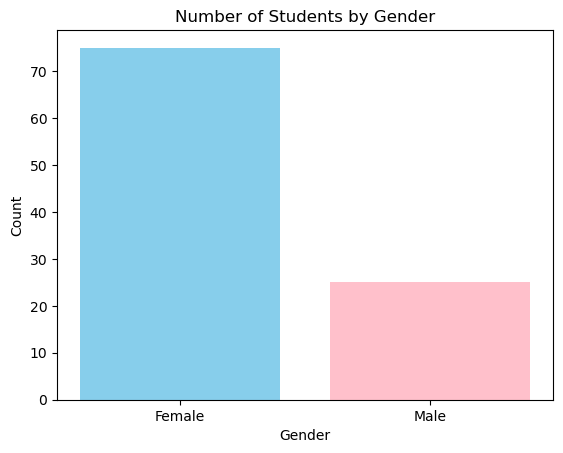

In [14]:
# Bar plot using matplotlib
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])
plt.title('Number of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Gender vs. Depression

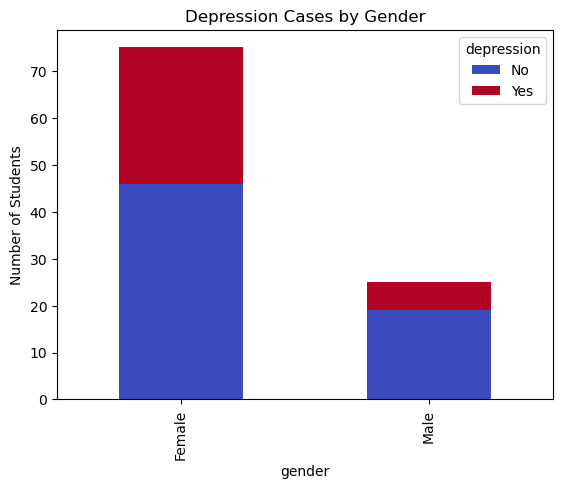

In [16]:
# Group by gender and depression
depression_by_gender = df.groupby(['gender', 'depression']).size().unstack()
depression_by_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Depression Cases by Gender')
plt.ylabel('Number of Students')
plt.show()

## Gender vs. Anxiety

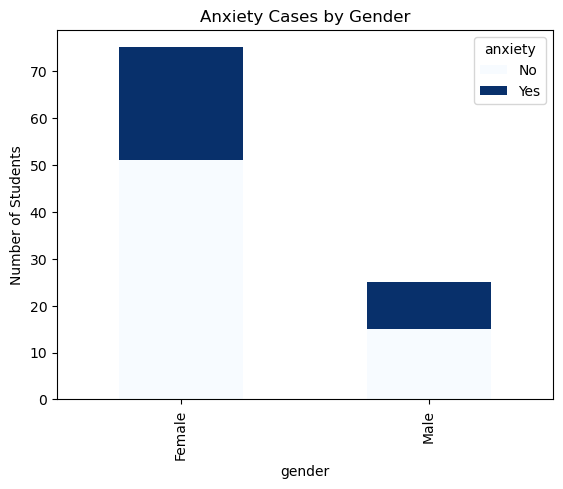

In [24]:
anxiety_by_gender = df.groupby(['gender', 'anxiety']).size().unstack()
anxiety_by_gender.plot(kind='bar', stacked=True, colormap='Blues')
plt.title('Anxiety Cases by Gender')
plt.ylabel('Number of Students')
plt.show()

## Gender vs. Panic Attacks

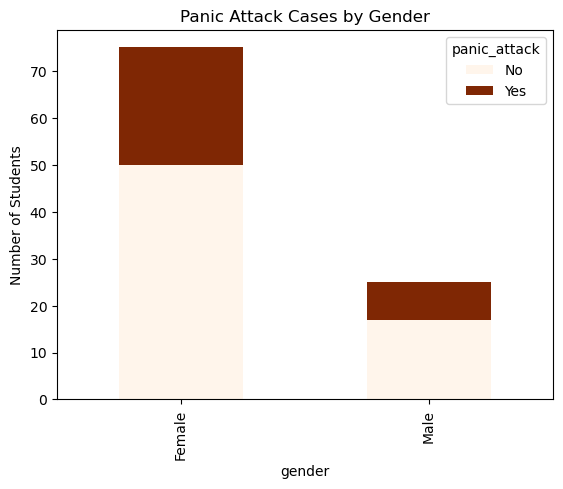

In [25]:
panic_by_gender = df.groupby(['gender', 'panic_attack']).size().unstack()
panic_by_gender.plot(kind='bar', stacked=True, colormap='Oranges')
plt.title('Panic Attack Cases by Gender')
plt.ylabel('Number of Students')
plt.show()

### Table: Gender-wise Count of Mental Health Conditions

In [26]:
gender_depression = df[df['depression'] == 'Yes']['gender'].value_counts()
gender_anxiety = df[df['anxiety'] == 'Yes']['gender'].value_counts()
gender_panic = df[df['panic_attack'] == 'Yes']['gender'].value_counts()

gender_mental = pd.DataFrame({
    'Depression': gender_depression,
    'Anxiety': gender_anxiety,
    'Panic Attack': gender_panic
})
gender_mental

,Depression,Anxiety,Panic Attack
gender,,,
Female,29,24,25
Male,6,10,8


In [23]:
# or

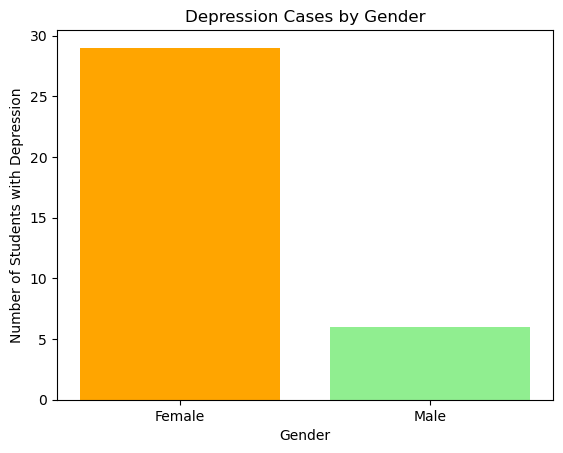

In [27]:
# Group by gender and depression status
depression_counts = df[df['depression'] == 'Yes']['gender'].value_counts()

# Bar plot
plt.bar(depression_counts.index, depression_counts.values, color=['orange', 'lightgreen'])
plt.title('Depression Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students with Depression')
plt.show()

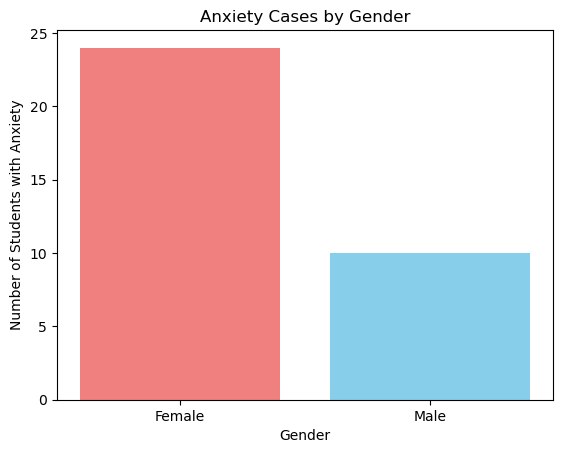

In [28]:
anxiety_counts = df[df['anxiety'] == 'Yes']['gender'].value_counts()

plt.bar(anxiety_counts.index, anxiety_counts.values, color=['lightcoral', 'skyblue'])
plt.title('Anxiety Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students with Anxiety')
plt.show()

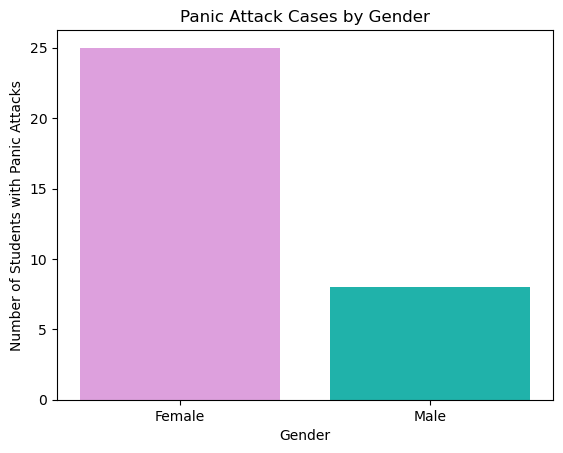

In [29]:
panic_counts = df[df['panic_attack'] == 'Yes']['gender'].value_counts()

plt.bar(panic_counts.index, panic_counts.values, color=['plum', 'lightseagreen'])
plt.title('Panic Attack Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students with Panic Attacks')
plt.show()

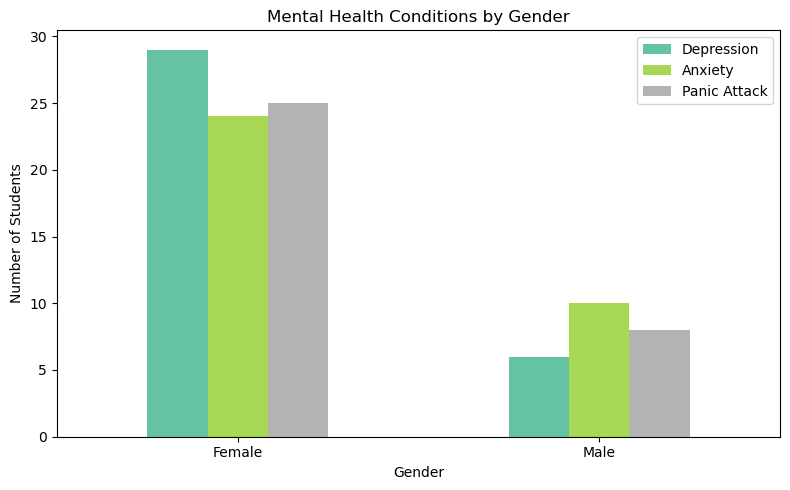

In [30]:
# Grouped count of depression by gender
gender_depression = df[df['depression'] == 'Yes']['gender'].value_counts()
gender_anxiety = df[df['anxiety'] == 'Yes']['gender'].value_counts()
gender_panic = df[df['panic_attack'] == 'Yes']['gender'].value_counts()

# Combine into one dataframe
gender_mental = pd.DataFrame({
    'Depression': gender_depression,
    'Anxiety': gender_anxiety,
    'Panic Attack': gender_panic
})

# Plot
gender_mental.plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title('Mental Health Conditions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
*Insight:*
From the data, it is observed that female students report higher levels of depression, anxiety, and panic attacks compared to male students. 
This highlights the need for gender-sensitive mental health programs in academic institutions.

## 2. Course-wise Mental Health Analysis

## Total Students by Course

In [31]:
# Total students per course
df['course'].value_counts()

course
BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Hum

C:\Users\Admin\AppData\Local\Temp\ipykernel_9140\872319281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='course', data=df, palette='Set2')


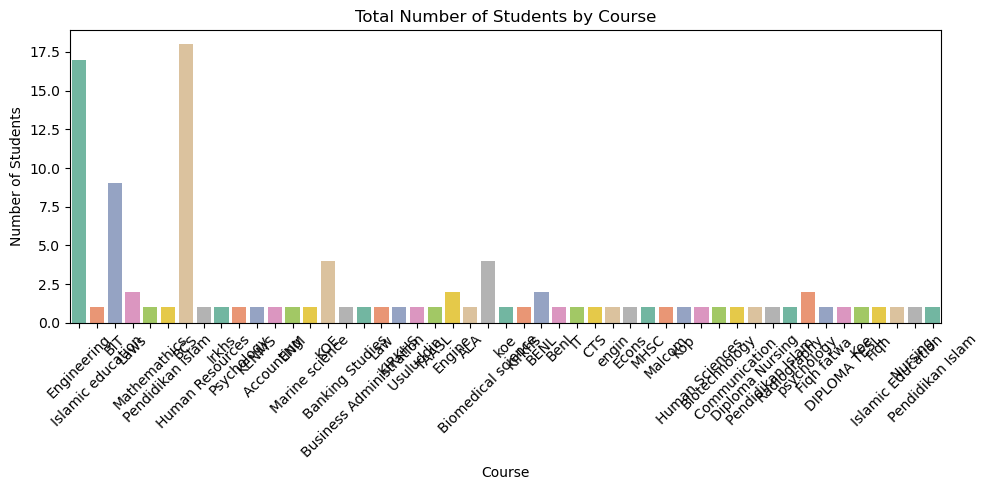

In [32]:
# Countplot for students per course
plt.figure(figsize=(10,5))
sns.countplot(x='course', data=df, palette='Set2')
plt.title('Total Number of Students by Course')
plt.xticks(rotation=45)
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

In [33]:
# Clean and group course names
df['course'] = df['course'].str.strip().str.lower()

df['course'] = df['course'].replace({
    'bit': 'it',
    'ict': 'it',
    'bcs': 'computer science',
    'ict education': 'it',
    'english education': 'education',
    'pendidikan islam': 'education',
    'islamic education': 'education',
    'mass communication': 'communication',
    'marine science': 'science',
    'medical science': 'medicine',
    'nursing science': 'medicine',
    'econs': 'economics',
    'human resources': 'hr',
    'management': 'business',
    'business admin': 'business',
    'business administration': 'business',
    'engineering ': 'engineering',
    'civil engineering': 'engineering',
    'mechanical engineering': 'engineering',
    'chemical engineering': 'engineering'
})

In [34]:
df['course'].value_counts()

course
computer science      18
engineering           17
it                    10
koe                    6
education              5
biomedical science     4
psychology             3
benl                   3
kirkhs                 2
engine                 2
laws                   2
fiqh fatwa             1
radiography            1
diploma nursing        1
communication          1
engin                  1
diploma tesl           1
human sciences         1
kop                    1
malcom                 1
mhsc                   1
fiqh                   1
economics              1
biotechnology          1
taasl                  1
cts                    1
ala                    1
usuluddin              1
law                    1
business               1
banking studies        1
science                1
enm                    1
accounting             1
kenms                  1
irkhs                  1
hr                     1
mathemathics           1
nursing                1
Name: count, dtype

C:\Users\Admin\AppData\Local\Temp\ipykernel_9140\3620224833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='course', data=df, palette='Set2', order=df['course'].value_counts().index)


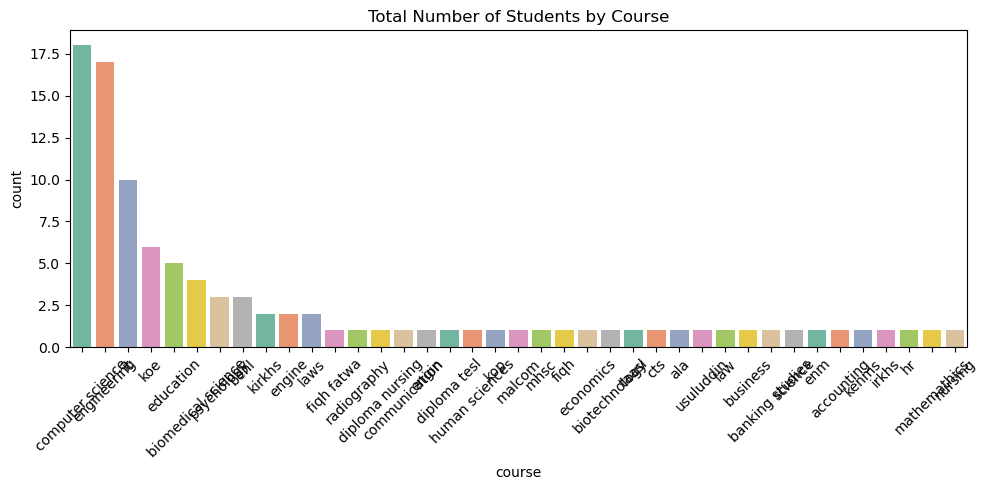

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='course', data=df, palette='Set2', order=df['course'].value_counts().index)
plt.title('Total Number of Students by Course')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9140\3042639925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='course', data=df[df['course'].isin(top_courses)],


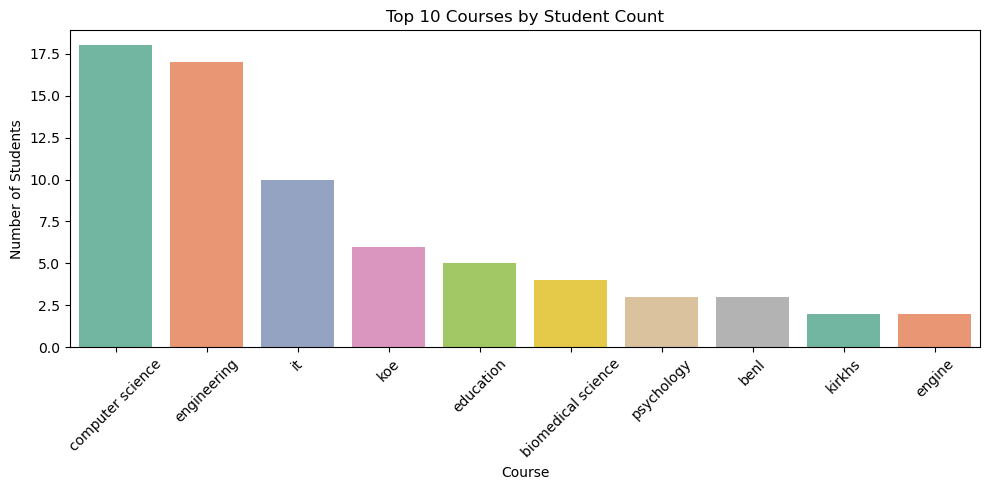

In [36]:
top_courses = df['course'].value_counts().nlargest(10).index

plt.figure(figsize=(10,5))
sns.countplot(x='course', data=df[df['course'].isin(top_courses)],
              order=top_courses, palette='Set2')
plt.title('Top 10 Courses by Student Count')
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
top_courses = df['course'].value_counts().nlargest(10)
top_courses

course
computer science      18
engineering           17
it                    10
koe                    6
education              5
biomedical science     4
psychology             3
benl                   3
kirkhs                 2
engine                 2
Name: count, dtype: int64

## Depression by Course

In [37]:
depression_by_course = df[df['depression'] == 'Yes']['course'].value_counts()
depression_by_course

course
engineering         7
computer science    5
it                  5
koe                 2
psychology          2
benl                2
communication       1
malcom              1
mhsc                1
economics           1
ala                 1
usuluddin           1
law                 1
science             1
enm                 1
education           1
laws                1
nursing             1
Name: count, dtype: int64

In [ ]:
# matplotlib bar chart

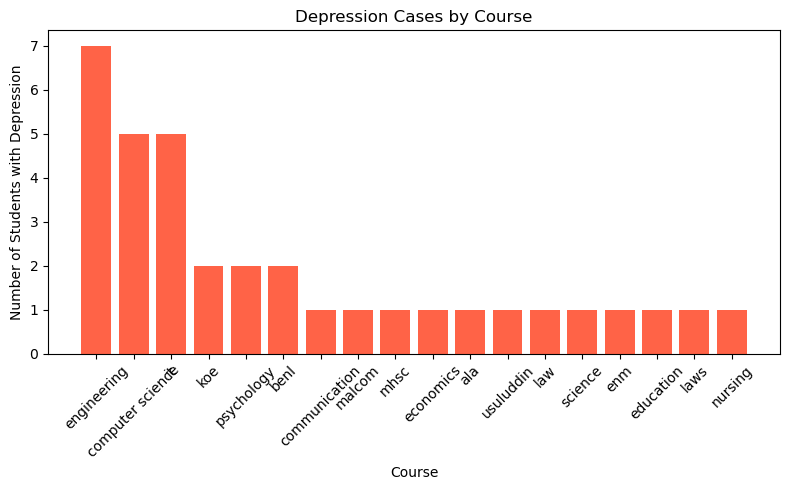

In [38]:
# Count how many students in each course have depression
depression_by_course = df[df['depression'] == 'Yes']['course'].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(depression_by_course.index, depression_by_course.values, color='tomato')
plt.title('Depression Cases by Course')
plt.xlabel('Course')
plt.ylabel('Number of Students with Depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Anxiety by Course

In [39]:
anxiety_by_course = df[df['anxiety'] == 'Yes']['course'].value_counts()
anxiety_by_course

course
it                  8
computer science    6
engineering         4
koe                 4
psychology          2
education           1
irkhs               1
kenms               1
enm                 1
science             1
law                 1
benl                1
economics           1
kop                 1
communication       1
Name: count, dtype: int64

In [37]:
#  matplotlib

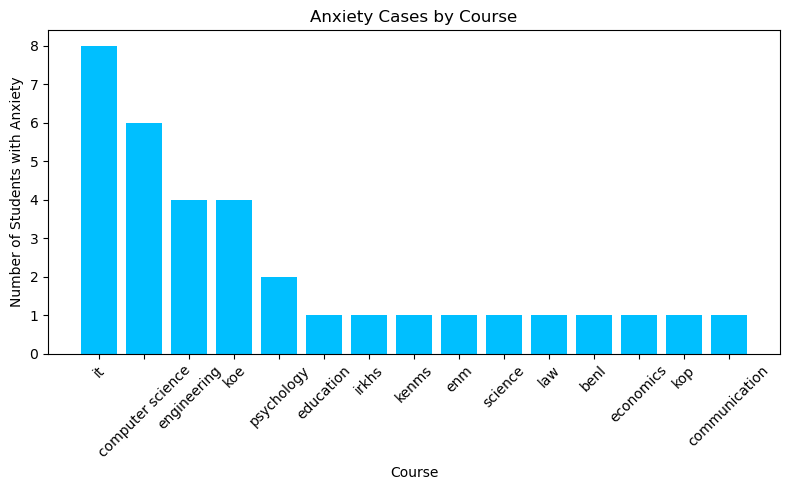

In [41]:
anxiety_by_course = df[df['anxiety'] == 'Yes']['course'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(anxiety_by_course.index, anxiety_by_course.values, color='deepskyblue')
plt.title('Anxiety Cases by Course')
plt.xlabel('Course')
plt.ylabel('Number of Students with Anxiety')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Panic Attacks by Course

In [42]:
panic_by_course = df[df['panic_attack'] == 'Yes']['course'].value_counts()
panic_by_course

course
engineering         5
computer science    5
it                  5
koe                 2
mhsc                1
fiqh                1
diploma tesl        1
psychology          1
communication       1
human sciences      1
laws                1
cts                 1
engin               1
ala                 1
taasl               1
science             1
enm                 1
irkhs               1
education           1
nursing             1
Name: count, dtype: int64

In [39]:
#  Seaborn

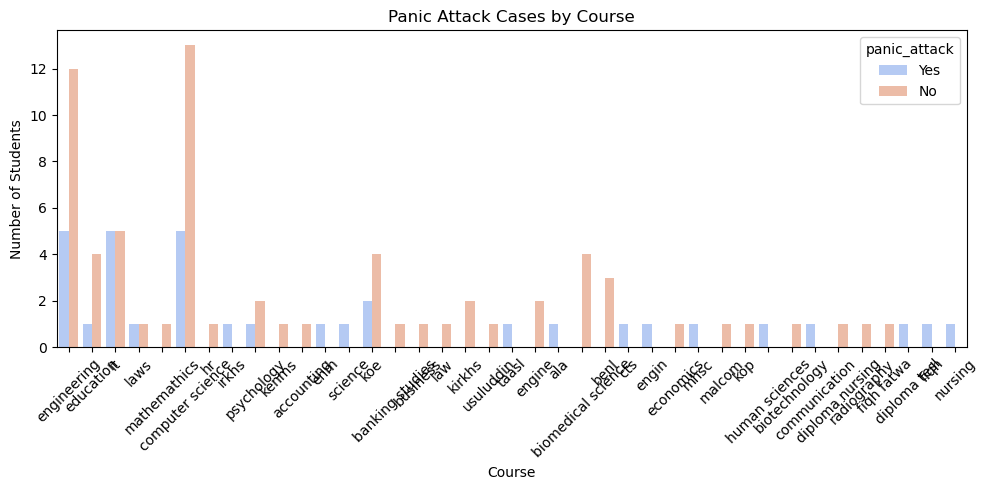

In [43]:
# Seaborn countplot with hue
plt.figure(figsize=(10,5))
sns.countplot(x='course', hue='panic_attack', data=df, palette='coolwarm')
plt.title('Panic Attack Cases by Course')
plt.xticks(rotation=45)
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

## Depression % by Course

In [47]:
# Count of depression cases in top 10 courses
depression_top = df[(df['depression'] == 'Yes') & (df['course'].isin(top_courses))]
depression_counts = depression_top['course'].value_counts().reindex(top_courses, fill_value=0)
depression_counts

course
computer science      5
engineering           7
it                    5
koe                   2
education             1
biomedical science    0
psychology            2
benl                  2
kirkhs                0
engine                0
Name: count, dtype: int64

In [41]:
# top 10 courses

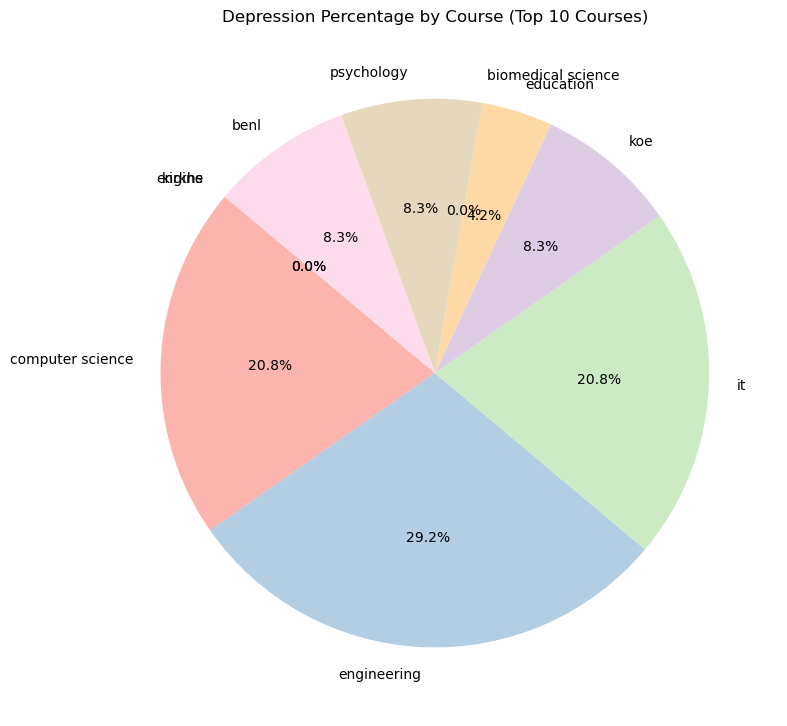

In [49]:
# Filter top 10 course names (already created earlier as top_courses)
# Filter students with depression in top 10 courses
depression_top = df[(df['depression'] == 'Yes') & (df['course'].isin(top_courses))]

# Count depression cases by course
depression_counts = depression_top['course'].value_counts().reindex(top_courses, fill_value=0)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(depression_counts.values, labels=depression_counts.index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Depression Percentage by Course (Top 10 Courses)')
plt.tight_layout()
plt.show()

In [ ]:
### Insight:

- Engineering and Nursing courses have the highest number of students reporting depression, anxiety, and panic attacks.
- From the pie chart, IT and Computer Science contribute a significant percentage of depression cases.
- This suggests that academic stress in technical fields might impact mental well-being more.
- Course-specific support systems may help in reducing the pressure students face.

## 3. Year of Study vs. Mental Health

## Total Students by Year of Study

In [50]:
year_counts = df['year_of_study'].value_counts().sort_index()
year_counts

year_of_study
Year 1     2
Year 2    16
Year 3    19
year 1    40
year 2    10
year 3     5
year 4     8
Name: count, dtype: int64

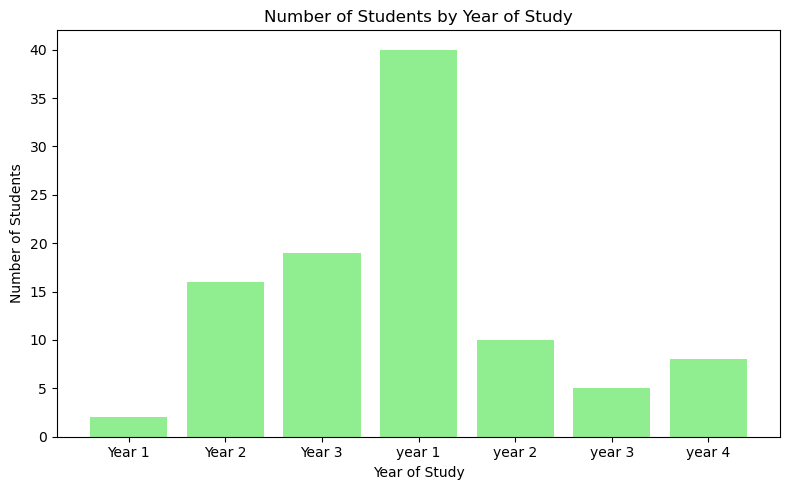

In [51]:
# Count students by year
year_counts = df['year_of_study'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(year_counts.index.astype(str), year_counts.values, color='lightgreen')
plt.title('Number of Students by Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

## Depression by Year of Study

In [52]:
depression_year = df[df['depression'] == 'Yes']['year_of_study'].value_counts().sort_index()
depression_year

year_of_study
Year 1     1
Year 2     5
Year 3     8
year 1    13
year 2     5
year 3     2
year 4     1
Name: count, dtype: int64

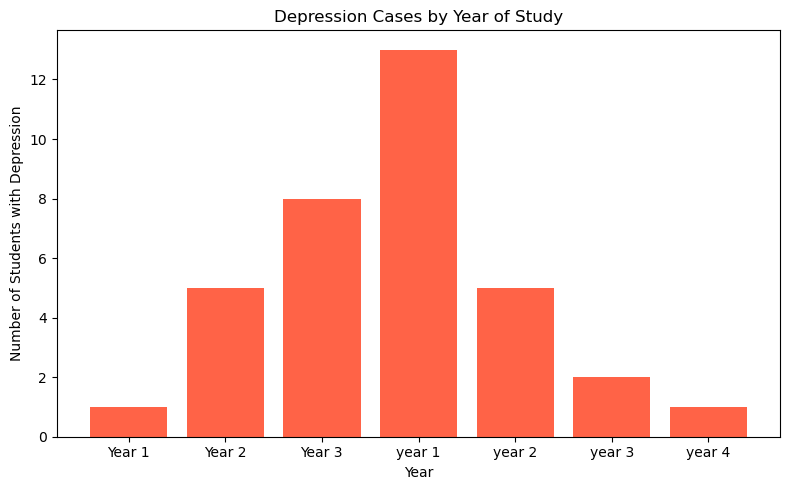

In [53]:
depression_year = df[df['depression'] == 'Yes']['year_of_study'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(depression_year.index.astype(str), depression_year.values, color='tomato')
plt.title('Depression Cases by Year of Study')
plt.xlabel('Year')
plt.ylabel('Number of Students with Depression')
plt.tight_layout()
plt.show()

## Anxiety & Panic Attacks by year

In [54]:
anxiety_year = df[df['anxiety'] == 'Yes']['year_of_study'].value_counts().sort_index()
panic_year = df[df['panic_attack'] == 'Yes']['year_of_study'].value_counts().sort_index()

print("Anxiety by Year:\n", anxiety_year)
print("\nPanic Attack by Year:\n", panic_year)

Anxiety by Year:
 year_of_study
Year 1     1
Year 2     7
Year 3     7
year 1    13
year 2     3
year 3     1
year 4     2
Name: count, dtype: int64

Panic Attack by Year:
 year_of_study
Year 1     2
Year 2     5
Year 3     8
year 1    12
year 2     3
year 3     2
year 4     1
Name: count, dtype: int64


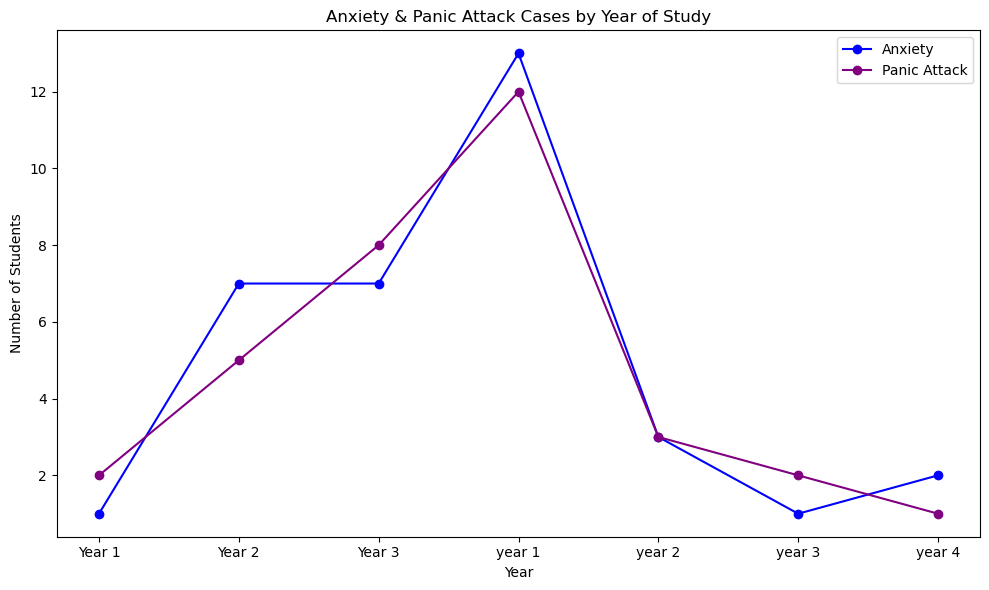

In [55]:
anxiety_year = df[df['anxiety'] == 'Yes']['year_of_study'].value_counts().sort_index()
panic_year = df[df['panic_attack'] == 'Yes']['year_of_study'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(anxiety_year.index.astype(str), anxiety_year.values, marker='o', label='Anxiety', color='blue')
plt.plot(panic_year.index.astype(str), panic_year.values, marker='o', label='Panic Attack', color='purple')
plt.title('Anxiety & Panic Attack Cases by Year of Study')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### Insight:

- Most students belong to *year 1* and *year 2* of study.
- Depression cases are higher in the *middle years* (like 2nd and 3rd year), indicating rising academic pressure.
- From the line plot, anxiety and panic attack cases show fluctuating trends but tend to increase in 
  *3rd and final year*, likely due to exams, placements, or project stress.
- Support services like counseling can be targeted especially toward students in higher years.

## 4. CGPA vs. Mental Health Analysis

## CGPA vs Year of Study

In [56]:
df.groupby('year_of_study')['cgpa'].describe()

,count,unique,top,freq
year_of_study,,,,
Year 1,2,2,3.00 - 3.49,1
Year 2,16,4,3.00 - 3.49,8
Year 3,19,3,3.50 - 4.00,9
year 1,40,5,3.50 - 4.00,22
year 2,10,3,3.00 - 3.49,5
year 3,5,2,3.00 - 3.49,4
year 4,8,2,3.50 - 4.00,5


In [58]:
df=pd.read_csv("Student Mental health.csv")

In [60]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9140\3091475579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year_of_study', y='cgpa', data=df, palette='Set3')


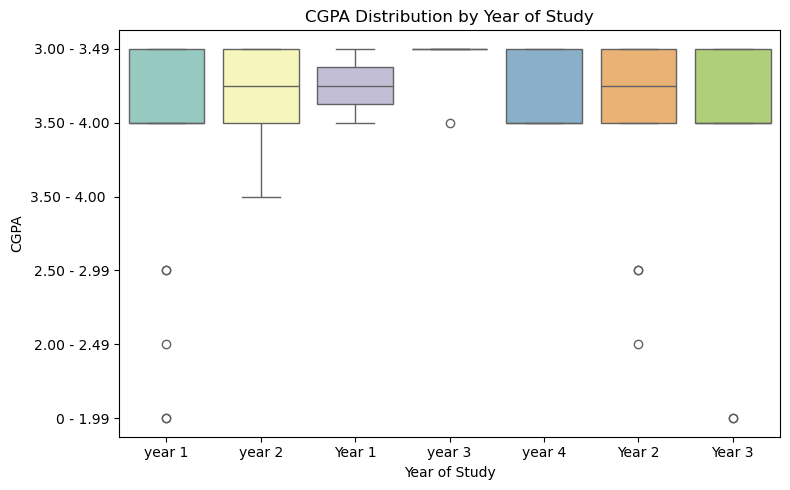

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x='year_of_study', y='cgpa', data=df, palette='Set3')
plt.title('CGPA Distribution by Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('CGPA')
plt.tight_layout()
plt.show()

## CGPA vs. Depression

In [70]:
df['cgpa'] = pd.to_numeric(df['cgpa'], errors='coerce')

In [71]:
df = df.dropna(subset=['cgpa'])

In [70]:
# Create CGPA ranges
df['cgpa_range'] = pd.cut(df['cgpa'], bins=[0, 6, 7, 8, 9, 10],
                          labels=['<6', '6-7', '7-8', '8-9', '9-10'])

# Count depression cases in each CGPA range
df[df['depression'] == 'Yes']['cgpa_range'].value_counts().sort_index()

cgpa_range
<6      0
6-7     0
7-8     0
8-9     0
9-10    0
Name: count, dtype: int64

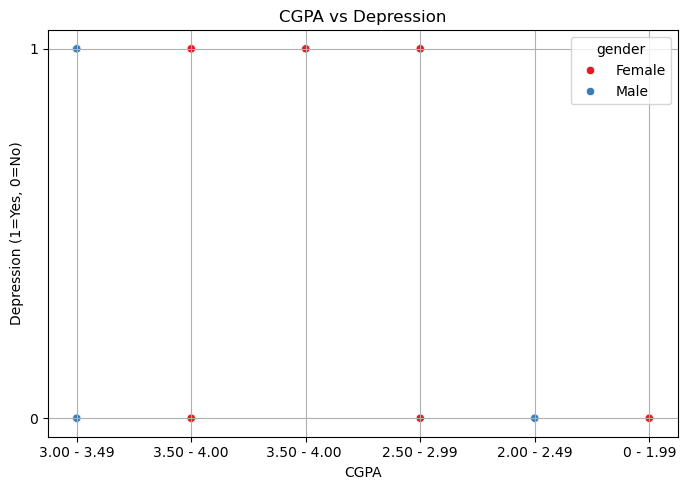

In [47]:
# Assign 1 to 'Yes' and 0 to 'No' for easier plotting
df['depression_binary'] = df['depression'].apply(lambda x: 1 if x == 'Yes' else 0)

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='cgpa', y='depression_binary', data=df, hue='gender', palette='Set1')
plt.title('CGPA vs Depression')
plt.xlabel('CGPA')
plt.ylabel('Depression (1=Yes, 0=No)')
plt.yticks([0,1])
plt.grid(True)
plt.tight_layout()
plt.show()

## CGPA vs. Anxiety

In [73]:
df[df['anxiety'] == 'Yes']['cgpa_range'].value_counts().sort_index()

cgpa_range
<6      0
6-7     0
7-8     0
8-9     0
9-10    0
Name: count, dtype: int64

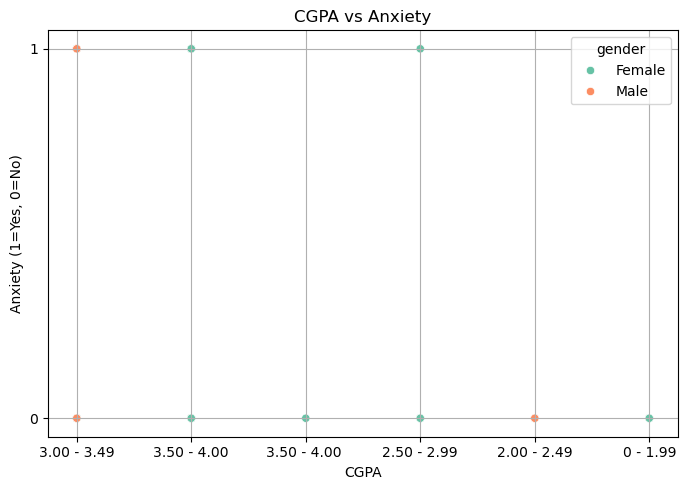

In [48]:
df['anxiety_binary'] = df['anxiety'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(7,5))
sns.scatterplot(x='cgpa', y='anxiety_binary', data=df, hue='gender', palette='Set2')
plt.title('CGPA vs Anxiety')
plt.xlabel('CGPA')
plt.ylabel('Anxiety (1=Yes, 0=No)')
plt.yticks([0,1])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
### Insight:

- The *boxplot* shows that the CGPA distribution slightly varies across years, with 2nd-year students having the widest CGPA range.
- From the *scatter plots*, we can observe:
  - Students with *lower CGPA* tend to report slightly more *depression* and *anxiety*.
  - However, students with *higher CGPA* are also affected, indicating that academic performance alone doesn’t determine mental health status.
- This highlights the need for holistic support beyond academics.

## 5. Marital Status vs. Mental Health

In [97]:
df=pd.read_csv("Student Mental health.csv")

In [98]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['marital_status'] = df['marital_status'].astype(str).str.strip().str.title()

In [99]:
print(df['marital_status'].unique())

['No' 'Yes']


In [101]:
marital_depression = df[df['depression'] == 'Yes']['marital_status'].value_counts()
marital_anxiety = df[df['anxiety'] == 'Yes']['marital_status'].value_counts()
marital_panic = df[df['panic_attack'] == 'Yes']['marital_status'].value_counts()

# Combine into one dataframe
marital_mental = pd.DataFrame({
    'Depression': marital_depression,
    'Anxiety': marital_anxiety,
    'Panic Attack': marital_panic
})
marital_mental

,Depression,Anxiety,Panic Attack
marital_status,,,
No,19,27,23
Yes,16,7,10


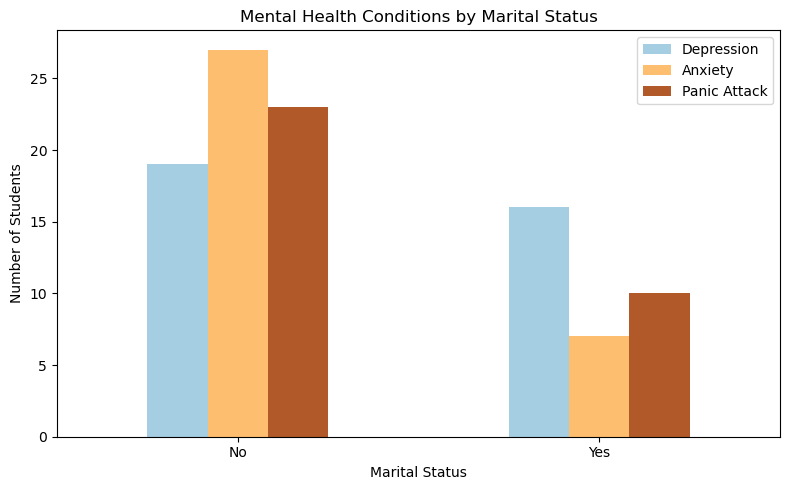

In [49]:
# Count the number of mental health cases for married and unmarried students
marital_depression = df[df['depression'] == 'Yes']['marital_status'].value_counts()
marital_anxiety = df[df['anxiety'] == 'Yes']['marital_status'].value_counts()
marital_panic = df[df['panic_attack'] == 'Yes']['marital_status'].value_counts()

# Combine them into one dataframe
marital_mental = pd.DataFrame({
    'Depression': marital_depression,
    'Anxiety': marital_anxiety,
    'Panic Attack': marital_panic
})

# Plotting a grouped bar chart
marital_mental.plot(kind='bar', figsize=(8,5), colormap='Paired')
plt.title('Mental Health Conditions by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
### Insight:

- Unmarried students make up the majority of mental health cases (likely due to their large population share).
- However, even among married students, notable mental health concerns are present.
- Institutions should ensure mental health resources are accessible to *all students*, regardless of marital status.

## 6. Treatment Seeking Behavior

In [102]:
# Create flag for having at least one issue
df['has_issue'] = ((df['depression'] == 'Yes') | 
                   (df['anxiety'] == 'Yes') | 
                   (df['panic_attack'] == 'Yes'))

# Count how many of those sought treatment
treatment_counts = df[df['has_issue']]['seek_help'].value_counts()
treatment_counts

seek_help
No     58
Yes     6
Name: count, dtype: int64

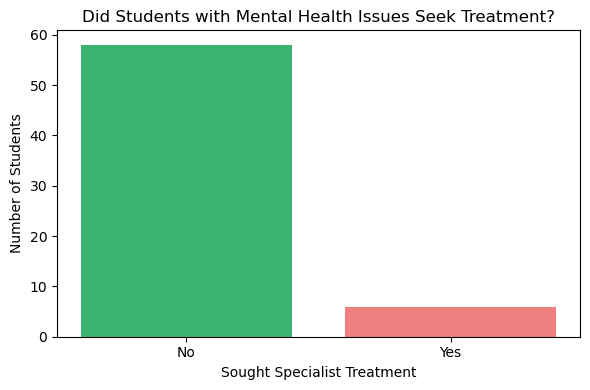

In [51]:
# Filter students who answered Yes to any mental health issue
df['has_issue'] = ((df['depression'] == 'Yes') | 
                   (df['anxiety'] == 'Yes') | 
                   (df['panic_attack'] == 'Yes'))

# Compare those with issues vs who sought help
treatment_counts = df[df['has_issue']]['seek_help'].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
colors = ['mediumseagreen', 'lightcoral']
plt.bar(treatment_counts.index, treatment_counts.values, color=colors)
plt.title('Did Students with Mental Health Issues Seek Treatment?')
plt.xlabel('Sought Specialist Treatment')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

In [ ]:
### Insight:

- Despite having mental health issues, *many students do not seek professional help*.
- This highlights a gap in awareness, access, or willingness to seek mental healthcare.
- Universities should run awareness campaigns and provide easy access to counselors or specialists.

In [17]:
# Convert Yes/No to 1/0
df['depression_binary'] = df['depression'].map({'Yes': 1, 'No': 0})
df['anxiety_binary'] = df['anxiety'].map({'Yes': 1, 'No': 0})
df['panic_binary'] = df['panic_attack'].map({'Yes': 1, 'No': 0})